**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [36]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances

from scipy import stats
from scipy.spatial import distance

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [65]:
class MyKNeighborsClassifier(BaseEstimator):

    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X)

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.brute(X)
        return self.kdtree(X)

    def brute(self, X):
        distances = pairwise_distances(X, self.X, self.metric)
        result = self.y[np.argsort(distances)][:, :self.n_neighbors]
        return stats.mode(result, axis=1)[0].reshape(X.shape[0])

    def kdtree(self, X):
        _, indices = self.tree.query(X, k=self.n_neighbors)
        result = self.y[indices]
        return stats.mode(result, axis=1)[0].reshape(X.shape[0])


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [66]:
iris = datasets.load_iris()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [68]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [69]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [70]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [71]:
%time clf.fit(X_train, y_train)

CPU times: user 3.36 ms, sys: 0 ns, total: 3.36 ms
Wall time: 2.55 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [72]:
%time my_clf.fit(X_train, y_train)

CPU times: user 462 µs, sys: 41 µs, total: 503 µs
Wall time: 368 µs


In [73]:
%time clf.predict(X_test)

CPU times: user 2.92 ms, sys: 257 µs, total: 3.18 ms
Wall time: 4.24 ms


array([1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0])

In [74]:
%time my_clf.predict(X_test)

CPU times: user 3.23 ms, sys: 0 ns, total: 3.23 ms
Wall time: 2.3 ms


array([1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [75]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [76]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [77]:
%time clf.fit(X_train, y_train)

CPU times: user 4.2 ms, sys: 373 µs, total: 4.57 ms
Wall time: 6.88 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [78]:
%time my_clf.fit(X_train, y_train)

CPU times: user 266 µs, sys: 23 µs, total: 289 µs
Wall time: 282 µs


In [79]:
%time clf.predict(X_test)

CPU times: user 4.51 ms, sys: 43 µs, total: 4.55 ms
Wall time: 7.27 ms


array([2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2])

In [80]:
%time my_clf.predict(X_test)

CPU times: user 2.55 ms, sys: 87 µs, total: 2.63 ms
Wall time: 2.67 ms


array([2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2])

In [81]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [168]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [169]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
vectorizer = CountVectorizer(max_df=0.8)

In [98]:
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [100]:
from sklearn.model_selection import KFold, cross_val_score

In [101]:
kf = KFold(n_splits=3)

In [102]:
my_clf = MyKNeighborsClassifier(5, algorithm='brute')

In [103]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [104]:
scores = np.zeros(10)
for i in range(10):
    my_clf = MyKNeighborsClassifier(i+1, algorithm='brute')
    scores[i] = cross_val_score(my_clf, X, target, cv=3, n_jobs=-1, scoring='accuracy').mean()
scores

array([0.21177297, 0.1895877 , 0.1826938 , 0.18499195, 0.18437359,
       0.18534559, 0.18587586, 0.18773211, 0.18914608, 0.19135579])

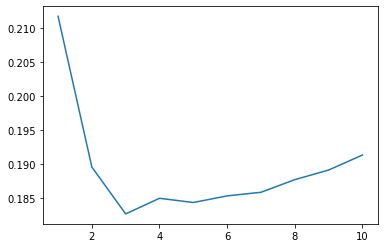

In [106]:
plt.plot(np.arange(1,11,1), scores)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [107]:
scores_cosine = np.zeros(10)
for i in range(10):
    my_clf = MyKNeighborsClassifier(i+1, algorithm='brute', metric='cosine')
    scores_cosine[i] = cross_val_score(my_clf, X, target, cv=3, n_jobs=-1, scoring='accuracy').mean()
scores_cosine

array([0.30325263, 0.28336527, 0.27770893, 0.27072586, 0.26621775,
       0.2630365 , 0.26294802, 0.2584403 , 0.25693787, 0.25446298])

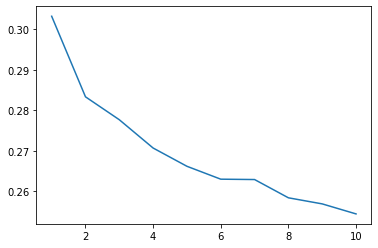

In [109]:
plt.plot(np.arange(1,11,1), scores_cosine)

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
tf_vectorizer = TfidfVectorizer(max_df=0.8)

X_tf = tf_vectorizer.fit_transform(data)

In [114]:
scores_tf = np.zeros(10)
for i in range(10):
    my_clf = MyKNeighborsClassifier(i+1, algorithm='brute', metric='cosine')
    scores_tf[i] = cross_val_score(my_clf, X_tf, target, cv=3, n_jobs=-1, scoring='accuracy').mean()
scores_tf

array([0.60774322, 0.57212235, 0.58166826, 0.58785597, 0.59209822,
       0.59227513, 0.59377787, 0.59413147, 0.59572235, 0.59315928])

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [159]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [172]:
data_test = newsgroups_test['data']
target_test = newsgroups_test['target']

In [175]:
X_test = tf_vectorizer.transform(data_test)

In [189]:
my_clf = MyKNeighborsClassifier(9, algorithm='brute', metric='cosine')

In [190]:
my_clf.fit(X_train, target_train)

In [191]:
y_pred = my_clf.predict(X_test)

In [192]:
accuracy_score(y_pred, target_test)

0.5323951141795008